### Problem 1

Generate 1000 points from a standard normal distribution using Box-Muller transormation
$$Z = \sqrt{-2\log U_1}\cos 2\pi U_2,~~ U_1, U_2 \sim U[0,1]$$
Plot the histogram of the points (``plt.hist``)

In [1]:
#matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = []
for i in range(500):
    u1 = np.random.random()
    u2 = np.random.random()
    x.append(np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2))
    x.append(np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2))

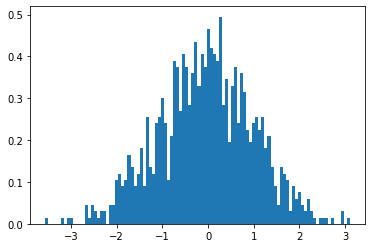

In [5]:
plt.hist(x, bins=100, density=True)
plt.show()

### Problem 2
Generate 1000 points from the distribution with the following PDF:
$$p(x) = \begin{cases}
\frac{1}{2x},~x\in [1, e^2]\\
0,~\text{otherwise}.
\end{cases}$$
Plot the histogram and compare with actual PDF.

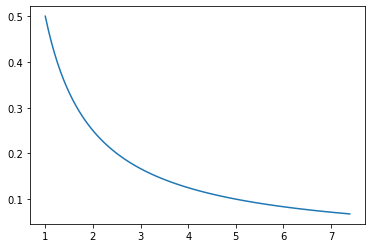

In [6]:
x_base = np.linspace(1,np.exp(2), 100)
plt.plot(x_base, 1/(2*x_base))

In [7]:
u = np.random.random(size=100000)
x = np.exp(2*u)

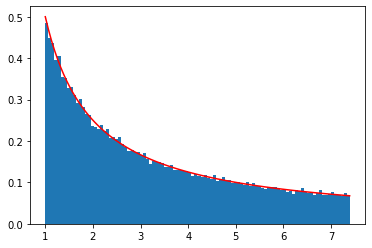

In [8]:
plt.hist(x, bins=100, density=True)
plt.plot(x_base, 1/(2*x_base), 'r-')
plt.show()

### Problem 3
Generate 1000 points from the distribution with the following PDF using rejection sampling:
$$p(x) = \frac{1}{\alpha}x\cos x, ~x\in [0; \pi/2], ~\alpha = \pi/2-1$$
Plot the histogram and compare with actual PDF.

In [15]:
a = np.pi/2-1
def p(x):
    return x*np.cos(x)/a

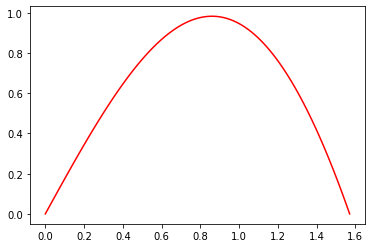

In [16]:
x_base = np.linspace(0,np.pi/2, 100)
plt.plot(x_base, p(x_base), 'r-')
plt.show()

In [23]:
x = []
while len(x)<100000:
    y = np.random.random()*np.pi/2
    A = p(y)/(2*2/np.pi)
    if np.random.random()<A:
        x.append(y)

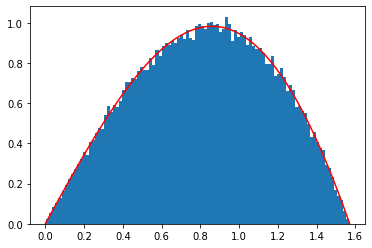

In [24]:
plt.hist(x, bins=100, density=True)
plt.plot(x_base, p(x_base), 'r-')
plt.show()

### Problem 4
Find the value of the integral using Monte-Carlo method, compare to the actual value of the integral
$$\int_{1}^{2}xe^{-2x^2}dx$$

In [25]:
def f1(x):
    return x*np.exp(-2*x**2)

In [26]:
analytic = (np.exp(-2)-np.exp(-8))/4

In [27]:
x = np.random.random(size=10000)+1
y = f1(x)
mc1 = y.mean()
print(mc1)
print(analytic)
print(np.abs(mc1-analytic)/analytic)

0.03373764476272327
0.033749955152177546
0.0003647527648190551


In [28]:
def f2(x):
    return 3/2*np.exp(-2*x**2)

In [29]:
u = np.random.random(size=10000)
x = np.sqrt(3*u+1)
y = f2(x)
mc2 = y.mean()
print(mc2)
print(analytic)
print(np.abs(mc2-analytic)/analytic)

0.03426926093062938
0.033749955152177546
0.015386858326486688


### Problem 6
We have an agent that behaves in the following way:
- It starts moving at the point $x=0$
- With probability 0.5 it goes right for 1 unit $x \leftarrow x+1$
- With probability 0.2 it goes left for 3 units $x \leftarrow x-3$
- with probability 0.25 it undoes the last action
- with probability 0.05 it returns to the origin

Plot the probability distribution of where the agent can end up after 100 steps. If we to set up a charging stations, where we should put those?

In [30]:
def step(x, x_prev):
    p = np.random.random()
    if p<0.05:
        return 0
    elif p<0.3:
        return x_prev
    elif p<0.5:
        return x-3
    else:
        return x+1

In [31]:
z = []
for i in range(10000):
    x = 0
    x_prev = 0
    for j in range(100):
        x_new = step(x, x_prev)
        x_prev = x
        x = x_new
    z.append(x)

In [32]:
print(np.array(z).shape)

(10000,)


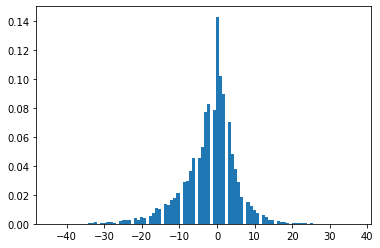

In [33]:
plt.hist(z, bins=100, density=True)
plt.show()

### Problem 6

Find the volume of a unit 3-D sphere.

Find volume of the unit 4-D sphere.
Compare to the precise value $V = \frac{\pi^2}{2}$